In [68]:
import pandas as pd


df = pd.read_csv("/home/clay/research/kaggle/kaggle_llm/data/kaggle-llm-science-exam/train.csv")
# df = pd.read_csv("/home/clay/research/kaggle/kaggle_llm/work_dirs/peft-deberta-v3-large-notebook-weights-2023-07-30-23-07-15/train_df.csv")

In [69]:
choices = ["A", "B", "C", "D", "E"]


def count_words(text):
    return sum([1 for i in text.split() if len(i) > 0])


df["prompt_wc"] = df["prompt"].apply(count_words)
for c in choices:
    df[f"{c}_wc"] = df[c].apply(count_words)
df["choice_wc"] = df[[f"{c}_wc" for c in choices]].max(axis=1)
df["all_wc"] = df["prompt_wc"] + df["choice_wc"]
df = df.sort_values("all_wc", ascending=False)

In [70]:
df["all_wc"].describe()

count    200.000000
mean      41.575000
std       19.657478
min       10.000000
25%       26.750000
50%       38.500000
75%       53.000000
max      138.000000
Name: all_wc, dtype: float64

In [71]:
df["prompt_wc"].describe()

count    200.000000
mean      11.360000
std        6.321408
min        3.000000
25%        6.000000
50%       10.000000
75%       14.000000
max       42.000000
Name: prompt_wc, dtype: float64

In [72]:
df["choice_wc"].describe()

count    200.000000
mean      30.215000
std       18.629387
min        1.000000
25%       17.000000
50%       28.000000
75%       42.000000
max      118.000000
Name: choice_wc, dtype: float64

<AxesSubplot: >

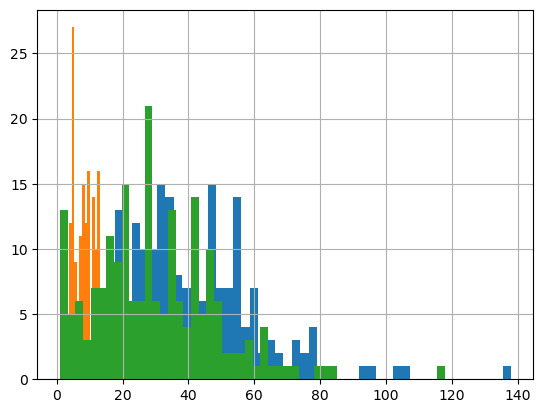

In [73]:
df["all_wc"].hist(bins=50)
df["prompt_wc"].hist(bins=50)
df["choice_wc"].hist(bins=50)

In [74]:
i = 0
print(df.iloc[i]["all_wc"], df.iloc[i]["prompt_wc"], df.iloc[i]["choice_wc"])
print(df.iloc[i]["prompt"])
print()
print("A", df.iloc[i]["A"])
print()
print("B", df.iloc[i]["B"])
print()
print("C", df.iloc[i]["C"])
print()
print("D", df.iloc[i]["D"])
print()
print("E", df.iloc[i]["E"])

138 20 118
What is the evidence for the existence of a supermassive black hole at the center of the Milky Way galaxy?

A The Milky Way galaxy has a supermassive black hole at its center because of the bright flare activity observed near Sagittarius A*. The radius of the central object must be less than 17 light-hours, because otherwise S2 would collide with it. Observations of the star S14 indicate that the radius is no more than 6.25 light-hours, about the diameter of Uranus' orbit. No known astronomical object other than a black hole can contain 4.0 million M☉ in this volume of space.

B The Milky Way galaxy has a supermassive black hole at its center because the star S14 follows an elliptical orbit with a period of 15.2 years and a pericenter of 17 light-hours from the center of the central object. From the motion of star S14, the object's mass can be estimated as 4.0 million M☉, or about 7.96×1036 kg. The radius of the central object must be less than 17 light-hours, because otherw

In [13]:
print(df.iloc[-1]["wc"])
print(df.iloc[-1]["prompt"])

22
What does the isothermal compressibility represent?
context 0: The reciprocal of the bulk modulus at fixed temperature is called the isothermal compressibility.


In [14]:
df.shape

(18057, 10)

In [15]:
long_questions = df[df["wc"] > 100]

In [16]:
i = 100
print(df.iloc[i]["wc"])
print(df.iloc[i]["prompt"])
print(df.iloc[i][["A", "B", "C", "D", "E"]])

86
Which type of equations of state give more accurate results than traditional cubic equations of state?
context 0: In general, physically based equations of state give more accurate results than traditional cubic equations of state, especially for systems containing liquids or solids.
context 1: For process engineering, cubic equations of state are today still highly relevant, e.g. the Peng Robinson equation of state or the Soave Redlich Kwong equation of state.
context 2: There is a large number of physically based equations of state available today.
A          Historical equations of state
B           Empirical equations of state
C    Physically based equations of state
D      Multiparameter equations of state
E                          Ideal gas law
Name: 4805, dtype: object
